In [2]:
import sys
sys.path

['c:\\users\\hp\\anaconda3\\envs\\tensorflow\\python35.zip',
 'c:\\users\\hp\\anaconda3\\envs\\tensorflow\\DLLs',
 'c:\\users\\hp\\anaconda3\\envs\\tensorflow\\lib',
 'c:\\users\\hp\\anaconda3\\envs\\tensorflow',
 '',
 'c:\\users\\hp\\anaconda3\\envs\\tensorflow\\lib\\site-packages',
 'c:\\users\\hp\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\HP\\.ipython']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl

In [4]:
import scipy
from sklearn.model_selection import train_test_split

In [5]:
train_main = pd.read_csv("data/train_music.csv",delimiter=",")
test_main = pd.read_csv("data/test_music.csv",delimiter=",")
sample_submission = pd.read_csv("data/sample_submission_music.csv",delimiter=",")

In [6]:
Y=train_main['target']
#0 - id, 1 - target
X=train_main.drop(train_main.columns[[1]], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [8]:
X_train.shape

(49000, 460)

In [9]:
test_main.head()

,id,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4884052943,8,69,27,1.0,1,0.802538,0,313.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.047852,NaN,NaN
1,4849464468,7,69,27,1.0,0,0.884739,0,362.0,1.0,...,130.0,0.0,0.0,0.0,0.0,NaN,NaN,1353.623626,324.513773,NaN
2,4821178833,7,69,27,1.0,0,0.924148,0,364.0,1.0,...,180.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,4885021656,4,896,16,1.0,0,0.793656,0,352.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4857910326,7,1756,3,2.0,0,0.880180,0,363.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,447.897027,0.099378,NaN


In [10]:
test_main.shape

(30000, 460)

In [11]:
sample_submission.head()

,id,prediction
0,4884052943,0.0
1,4849464468,0.0
2,4821178833,0.0
3,4885021656,0.0
4,4857910326,0.0


In [12]:
sample_submission.shape

(30000, 2)

In [13]:
X_train.head()

,id,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
13802,4813619043,4,896,28,1.0,0,0.955483,0,322.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.178622,NaN
41012,48105220472,1,1,1,NaN,0,0.550999,0,318.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.022203,1.0
2262,4819698671,7,592,3,1.0,0,0.957614,0,359.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.7843,35.860094,1.336134,1.169779,NaN
58404,4848626425,7,1057,3,2.0,0,0.888445,0,343.0,1.0,...,57.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
40786,4889927958,7,592,3,2.0,0,0.767179,0,357.0,1.0,...,92.0,0.0,0.0,0.0,0.0,7.8432,NaN,7396.798472,232.159164,NaN


In [14]:
#create train+valid+test for convenience of transformations
XYtrain  = X_train
XYtrain.loc[:,'target'] = y_train
XYtrain.loc[:,'role'] = 'train'

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
XYvalid  = X_test
XYvalid.loc[:,'target'] = y_test
XYvalid.loc[:,'role'] = 'valid'

In [16]:
XYtest  = test_main
XYtest.loc[:,'target'] = 0
XYtest.loc[:,'role'] = 'test'

In [17]:
set(XYtest.loc[XYtest['role']=='test','id']).intersection(set(sample_submission['id'])) == set(sample_submission['id'])

True

In [18]:
XY = pd.concat([XYtrain, XYvalid, XYtest], ignore_index=False)

fill NULL with 0

In [21]:
XY = XY.apply(lambda x: x.fillna(0),axis=0)
X_train = X_train.apply(lambda x: x.fillna(0),axis=0)

deal with categorical variables: combine rare values, make one-hot encoding

In [22]:
cat = [
    'device_type',
    'manufacturer_category',
    'os_category'
]

In [23]:
series = pd.value_counts(X_train['manufacturer_category'])
#mask = (series/series.sum() * 100).lt(10)
mask = series .lt(4000)
# To replace df['column'] use np.where I.e 
X_train.loc[:,'manufacturer_category_new'] = np.where(X_train['manufacturer_category'].isin(series[mask].index),2000,X_train['manufacturer_category'])

In [24]:
X_train['manufacturer_category_new'].value_counts()

2000    25735
1057    12417
1756     6100
69       4748
Name: manufacturer_category_new, dtype: int64

In [25]:
#mask = XY.manufacturer_category is not in [2000,1057,1756,69]

In [26]:
XY.loc[:,'manufacturer_category_new'] = XY['manufacturer_category']

In [27]:
XY.loc[:,'manufacturer_category_new'] = XY['manufacturer_category'].apply(lambda x:x if x in (1057,1756,69) else 2000)

In [28]:
XY.loc[XY['role']=='train','manufacturer_category_new'].value_counts()

2000    25735
1057    12417
1756     6100
69       4748
Name: manufacturer_category_new, dtype: int64

In [29]:
XY.loc[:,'manufacturer_category_new'].value_counts()

2000    52424
1057    25462
1756    12548
69       9566
Name: manufacturer_category_new, dtype: int64

In [31]:
X_train.loc[:,'device_type_new'] = X_train['device_type']

In [32]:
series2 = pd.value_counts(X_train['device_type'])
mask = series2.lt(4000)
X_train.loc[:,'device_type_new'] = np.where(X_train['device_type'].isin(series2[mask].index),10,X_train['device_type'])

In [33]:
X_train.loc[:,'device_type_new'].value_counts()

7     40122
4      6863
10     2015
Name: device_type_new, dtype: int64

In [34]:
XY.loc[:,'device_type_new'] = XY['device_type'].apply(lambda x:x if x in (7,4) else 10)

In [35]:
XY.loc[XY['role']=='train','device_type_new'].value_counts()

7     40122
4      6863
10     2015
Name: device_type_new, dtype: int64

In [36]:
XY.loc[:,'device_type_new'].value_counts()

7     81987
4     13964
10     4049
Name: device_type_new, dtype: int64

In [37]:
series3 = pd.value_counts(X_train['os_category'])
mask = series3.lt(4000)
X_train.loc[:,'os_category_new'] = np.where(X_train['os_category'].isin(series3[mask].index),30,X_train['os_category'])

In [38]:
X_train.loc[:,'os_category_new'].value_counts()

3     35700
30     8552
27     4748
Name: os_category_new, dtype: int64

In [39]:
XY.loc[:,'os_category_new'] = XY['os_category'].apply(lambda x:x if x in (3,27) else 30)

In [40]:
XY.loc[XY['role']=='train','os_category_new'].value_counts()

3     35700
30     8552
27     4748
Name: os_category_new, dtype: int64

In [41]:
XY.loc[:,'os_category_new'].value_counts()

3     72951
30    17483
27     9566
Name: os_category_new, dtype: int64

one hot encoding

In [42]:
cat_new = ['manufacturer_category_new','device_type_new','os_category_new']

In [43]:
X_train = pd.get_dummies(X_train, prefix_sep="__",
                              columns=cat_new)
XY = pd.get_dummies(XY, prefix_sep="__",
                              columns=cat_new)

In [44]:
XY.head()

,id,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,...,manufacturer_category_new__69,manufacturer_category_new__1057,manufacturer_category_new__1756,manufacturer_category_new__2000,device_type_new__4,device_type_new__7,device_type_new__10,os_category_new__3,os_category_new__27,os_category_new__30
13802,4813619043,4,896,28,1.0,0,0.955483,0,322.0,1.0,...,0,0,0,1,1,0,0,0,0,1
41012,48105220472,1,1,1,0.0,0,0.550999,0,318.0,0.0,...,0,0,0,1,0,0,1,0,0,1
2262,4819698671,7,592,3,1.0,0,0.957614,0,359.0,1.0,...,0,0,0,1,0,1,0,1,0,0
58404,4848626425,7,1057,3,2.0,0,0.888445,0,343.0,1.0,...,0,1,0,0,0,1,0,1,0,0
40786,4889927958,7,592,3,2.0,0,0.767179,0,357.0,1.0,...,0,0,0,1,0,1,0,1,0,0


drop variables

In [45]:
drop_col = ['service_2_flag',
'inact_days_count',
'rr_gift_type_1',
'block_all_dur_m1',
'block_count_m1',   
'block_all_dur_m2',
'block_count_m2',   
'block_all_dur_m3',
'block_count_m3',
'service_8_count_m1',
'service_8_count_m2',
'service_8_count_m3'
]

In [46]:
drop_col = drop_col + cat
drop_col

['service_2_flag',
 'inact_days_count',
 'rr_gift_type_1',
 'block_all_dur_m1',
 'block_count_m1',
 'block_all_dur_m2',
 'block_count_m2',
 'block_all_dur_m3',
 'block_count_m3',
 'service_8_count_m1',
 'service_8_count_m2',
 'service_8_count_m3',
 'device_type',
 'manufacturer_category',
 'os_category']

In [47]:
X_train = X_train.drop(drop_col, axis=1)
XY = XY.drop(drop_col, axis=1)

In [48]:
#Add some variables to get a new one

In [49]:
def sumCols(df,col,names):
    df_new = df
    if (names):
        df_new[col] = 0
        for name in names:
            df_new[col] = df_new[col].add(df[name], fill_value=0)
        return df_new
    else:
        return df_new

In [50]:
#xxx = X_train
#xxx=sumCols(xxx,'lol',['device_type','os_category','sim_count'])
#xxx.head()
#xxx = X_train
#xxx=sumCols(xxx,'lol',sumlist1)
#xxx.loc[:,['count_sms_source_1','count_sms_source_2','count_sms_source_3','lol']].head()

In [51]:
sumlist1 = ['count_sms_source_1','count_sms_source_2','count_sms_source_3',
            'count_sms_source_4','count_sms_source_5','count_sms_source_6','count_sms_source_7','count_sms_source_8',
            'count_sms_source_9','count_sms_source_10','count_sms_source_11',
            'count_sms_source_12','count_sms_source_13','count_sms_source_14','count_sms_source_15','count_sms_source_16']

sumlist2 = ['count_sms_source_6','count_sms_source_7','count_sms_source_8',
            'count_sms_source_9','count_sms_source_10','count_sms_source_11']

sumlist3 = ['count_sms_source_1','count_sms_source_2','count_sms_source_3']
sumlist4 = ['count_sms_source_12','count_sms_source_13','count_sms_source_14','count_sms_source_15','count_sms_source_16']
sumlist5 = sumlist3+sumlist4


sumlist6 = ['count_url_category_1','count_url_category_2','count_url_category_3','count_url_category_4',
            'count_url_category_6','count_url_category_7','count_url_category_8','count_url_category_9',
            'count_url_category_10','count_url_category_11','count_url_category_12','count_url_category_13',
            'count_url_category_15']
sumlist7 = ['vol_app_1','vol_app_2','vol_app_3','vol_app_4','vol_app_5','vol_app_6','vol_app_7',
            'vol_app_8','vol_app_9','vol_app_10','vol_app_11','vol_app_12','vol_app_13','vol_app_14','vol_app_15','vol_app_16']
sumlist8 = ['count_app_1','count_app_2','count_app_3','count_app_4','count_app_5','count_app_6','count_app_7',
            'count_app_8','count_app_9','count_app_10','count_app_11','count_app_12','count_app_13','count_app_14','count_app_15','count_app_16']
sumlist9 = ['count_act_type_1','count_act_type_2','count_act_type_3','count_act_type_4','count_act_type_5',
            'count_act_type_6','count_act_type_7','count_act_type_8']
sumlist10 = ['count_gift_type_1','count_gift_type_2','count_gift_type_3','count_gift_type_4']


In [52]:
X_train=sumCols(X_train,'sumlist1',sumlist1)
XY=sumCols(XY,'sumlist1',sumlist1)
X_train=sumCols(X_train,'sumlist2',sumlist2)
XY=sumCols(XY,'sumlist2',sumlist2)
X_train=sumCols(X_train,'sumlist3',sumlist3)
XY=sumCols(XY,'sumlist3',sumlist3)
X_train=sumCols(X_train,'sumlist4',sumlist4)
XY=sumCols(XY,'sumlist4',sumlist4)
X_train=sumCols(X_train,'sumlist5',sumlist5)
XY=sumCols(XY,'sumlist5',sumlist5)
X_train=sumCols(X_train,'sumlist6',sumlist6)
XY=sumCols(XY,'sumlist6',sumlist6)
X_train=sumCols(X_train,'sumlist7',sumlist7)
XY=sumCols(XY,'sumlist7',sumlist7)
X_train=sumCols(X_train,'sumlist8',sumlist8)
XY=sumCols(XY,'sumlist8',sumlist8)
X_train=sumCols(X_train,'sumlist9',sumlist9)
XY=sumCols(XY,'sumlist9',sumlist9)
X_train=sumCols(X_train,'sumlist10',sumlist10)
XY=sumCols(XY,'sumlist10',sumlist10)

In [53]:
XY.head()

,id,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,service_3_flag,is_obl_center,...,sumlist1,sumlist2,sumlist3,sumlist4,sumlist5,sumlist6,sumlist7,sumlist8,sumlist9,sumlist10
13802,4813619043,1.0,0,0.955483,0,322.0,1.0,62.0,0.0,1,...,4.0,1.0,0.0,1.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0
41012,48105220472,0.0,0,0.550999,0,318.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,3.781690e+05,102.0,12.0,1.0
2262,4819698671,1.0,0,0.957614,0,359.0,1.0,679.0,0.0,0,...,29.0,13.0,0.0,2.0,2.0,487.0,2.834327e+06,1114.0,2.0,1.0
58404,4848626425,2.0,0,0.888445,0,343.0,1.0,794.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.476635e+07,132.0,30.0,5.0
40786,4889927958,2.0,0,0.767179,0,357.0,1.0,1204.0,0.0,1,...,3.0,0.0,3.0,0.0,3.0,114.0,3.720801e+09,15479.0,10.0,0.0


replace high values with 95 or 99 percentile
Do not forget about variables which are sum of other features

In [54]:
XY['sim_count'] = XY['sim_count'].replace(3,2)
X_train['sim_count'] = X_train['sim_count'].replace(3,2)

In [55]:
#perc = ['sumlist1','simlist2','sumlist3','sumlist4','sumlist5','sumlist6','sumlist7','sumlist8','sumlist9','sumlist10',]

col_names = list(XY.columns.values)
droplistcol = ['sim_count','id','device_type','manufacturer_category','os_category','tp_flag','block_flag',
               'service_1_flag','service_2_flag','service_3_flag','is_obl_center','is_my_vf',
               'inact_days_count','service_P_flag_m1','block_all_dur_m1','block_count_m1',
               'service_9_flag_m1','service_P_flag_m2','block_all_dur_m2','block_count_m2',
               'service_9_flag_m2','service_P_flag_m3','block_all_dur_m3','block_count_m3','service_9_flag_m3',
              'manufacturer_category_new__69',
 'manufacturer_category_new__1057',
 'manufacturer_category_new__1756',
 'manufacturer_category_new__2000',
 'device_type_new__4',
 'device_type_new__7',
 'device_type_new__10',
 'os_category_new__3',
 'os_category_new__27',
 'os_category_new__30',
               'target','role'
              ]
#col_names.remove(droplistcol)
perc = [e for e in col_names if e not in droplistcol]

In [56]:
#perc

In [57]:
percnum = np.percentile(X_train[perc],99,axis=0)

In [60]:
#np.minimum(XY[perc],percnum).head()

In [61]:
XY[perc] = np.minimum(XY[perc],percnum)
X_train[perc] = np.minimum(X_train[perc],percnum)

In [62]:
# Normalize features Do not forget about variables which are sum of other features

In [63]:
norm = perc

In [64]:
std_scale = skl.preprocessing.StandardScaler().fit(X_train[norm])
X_train_std = std_scale.transform(X_train[norm])
XY_std = std_scale.transform(XY[norm])
X_train[norm] = X_train_std
XY[norm] = XY_std
X_train[norm].head()

,lt,days_exp,service_1_count,balance_sum,paym_last_days,count_sms_source_1,count_sms_source_2,count_sms_source_3,count_sms_source_4,count_sms_source_5,...,sumlist1,sumlist2,sumlist3,sumlist4,sumlist5,sumlist6,sumlist7,sumlist8,sumlist9,sumlist10
13802,1.063479,0.071337,-0.440351,-0.531548,-0.380545,0.0,0.0,-0.303043,-0.324740,0.509046,...,-0.276067,-0.295171,-0.306758,0.212450,0.044248,-0.366721,-0.394845,-0.553789,-1.325973,-1.037704
41012,-1.505200,0.019776,-0.595724,-0.522286,-0.379988,0.0,0.0,-0.303043,-0.426634,-0.722598,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.394713,-0.539434,-0.561824,-0.784688
2262,1.077010,0.548277,1.105859,-0.518782,-0.385704,0.0,0.0,-0.303043,0.897979,0.509046,...,1.021255,1.122366,-0.306758,0.827302,0.539481,0.960309,-0.393857,-0.397010,-1.198615,-0.784688
58404,0.637753,0.342033,1.394050,-0.178638,-0.383473,0.0,0.0,-0.303043,-0.426634,-0.722598,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.382726,-0.535212,0.584400,0.227379
40786,-0.132349,0.522497,2.421515,-0.527336,-0.385426,0.0,0.0,3.871183,-0.426634,-0.722598,...,-0.327960,-0.413299,3.813246,-0.402402,1.034715,-0.056082,0.902155,1.624663,-0.689182,-1.037704


In [65]:
XY.head()

,id,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,service_3_flag,is_obl_center,...,sumlist1,sumlist2,sumlist3,sumlist4,sumlist5,sumlist6,sumlist7,sumlist8,sumlist9,sumlist10
13802,4813619043,1.0,0,1.063479,0,0.071337,1.0,-0.440351,0.0,1,...,-0.276067,-0.295171,-0.306758,0.212450,0.044248,-0.366721,-0.394845,-0.553789,-1.325973,-1.037704
41012,48105220472,0.0,0,-1.505200,0,0.019776,0.0,-0.595724,0.0,1,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.394713,-0.539434,-0.561824,-0.784688
2262,4819698671,1.0,0,1.077010,0,0.548277,1.0,1.105859,0.0,0,...,1.021255,1.122366,-0.306758,0.827302,0.539481,0.960309,-0.393857,-0.397010,-1.198615,-0.784688
58404,4848626425,2.0,0,0.637753,0,0.342033,1.0,1.394050,0.0,0,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.382726,-0.535212,0.584400,0.227379
40786,4889927958,2.0,0,-0.132349,0,0.522497,1.0,2.421515,0.0,1,...,-0.327960,-0.413299,3.813246,-0.402402,1.034715,-0.056082,0.902155,1.624663,-0.689182,-1.037704


In [66]:
X_train.head()

,id,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,service_3_flag,is_obl_center,...,sumlist1,sumlist2,sumlist3,sumlist4,sumlist5,sumlist6,sumlist7,sumlist8,sumlist9,sumlist10
13802,4813619043,1.0,0,1.063479,0,0.071337,1.0,-0.440351,0.0,1,...,-0.276067,-0.295171,-0.306758,0.212450,0.044248,-0.366721,-0.394845,-0.553789,-1.325973,-1.037704
41012,48105220472,0.0,0,-1.505200,0,0.019776,0.0,-0.595724,0.0,1,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.394713,-0.539434,-0.561824,-0.784688
2262,4819698671,1.0,0,1.077010,0,0.548277,1.0,1.105859,0.0,0,...,1.021255,1.122366,-0.306758,0.827302,0.539481,0.960309,-0.393857,-0.397010,-1.198615,-0.784688
58404,4848626425,2.0,0,0.637753,0,0.342033,1.0,1.394050,0.0,0,...,-0.483638,-0.413299,-0.306758,-0.402402,-0.450986,-0.366721,-0.382726,-0.535212,0.584400,0.227379
40786,4889927958,2.0,0,-0.132349,0,0.522497,1.0,2.421515,0.0,1,...,-0.327960,-0.413299,3.813246,-0.402402,1.034715,-0.056082,0.902155,1.624663,-0.689182,-1.037704


In [67]:
#mb block flag gives always 0
#standardize features!
#windsoring

In [69]:
#print (X_train.loc[:, X_train.apply(lambda x: x.nunique()) <3].columns.values)

In [303]:
#cat_dummies = [col for col in X_tr_processed 
#               if "__" in col 
#               and col.split("__")[0] in cat_columns]

In [312]:
#cat_dummies

In [313]:
#for col in cat_dummies:
#    print(col+'\t'+str(X_tr_processed[col].sum()))

In [314]:
#add similar logic for test!

In [315]:
#processed_columns = list(X_tr_processed.columns[:])

In [317]:
#X_test_processed = pd.get_dummies(X_test, prefix_sep="__", 
#                                   columns=cat_columns)

In [318]:
# Remove additional columns
#for col in X_test_processed.columns:
#    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
#        print("Removing additional feature {}".format(col))
#        X_test_processed.drop(col, axis=1, inplace=True)

In [320]:
#for col in cat_dummies:
#    if col not in X_test_processed.columns:
#        print("Adding missing feature {}".format(col))
#        X_test_processed[col] = 0

Adding missing feature voice_onnet_cc_count_m1__1.0


In [321]:
#X_test_processed = X_test_processed[processed_columns]

In [323]:
#X_test_processed.shape

(21040, 468)

In [325]:
#X_tr_processed.shape

(49093, 468)

In [262]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [263]:
#df2_processed = df2.drop(cat_columns, axis=1)

In [256]:
#df2_processed.shape

In [253]:
## For each categorical column
## We fit a label encoder, transform our column and 
## add it to our new dataframe
##strange filling of na with 1,2,3...! Replace by min-1 value before or smth?

#label_encoders = {}
#for col in cat_columns:
#    print("Encoding {}".format(col))
#    new_le = LabelEncoder()
#    df2_processed[col] = new_le.fit_transform(df2[col])
#    label_encoders[col] = new_le

In [252]:
#df2_processed[cat_columns].head()

In [251]:
#cat_columns_idx = [df2_processed.columns.get_loc(col) 
#                   for col in cat_columns]

In [250]:
#cat_columns_idx[1:10]

In [241]:
#ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")


In [247]:
#df_processed_np = ohe.fit_transform(df2_processed[cat_columns])

In [248]:
#df_processed_np

In [246]:
#print(df2_processed.isnull().sum())

In [245]:
#cat_columns

In [ ]:
#df_test_processed = df_test[[col for col in df_test.columns 
#                             if col not in cat_columns]]

In [ ]:
#for col in cat_columns:
#    print("Encoding {}".format(col))
#    label_map = {val: label for label, val in enumerate(label_encoders[col].classes_)}
#    print(label_map)
#    df_test_processed[col] = df_test[col].map(label_map)
#    # fillna and convert to int
#    df_test_processed[col] = df_test_processed[col].fillna(9999).astype(int)

In [88]:
#df_test_processed_np = ohe.transform(df_test_processed)

In [93]:
#column names
feature_names = list(XY.columns[:])
#feature_names = ['vol_app_14','count_app_14']

In [94]:
feature_names = [e for e in feature_names if e not in ['id','role','target']]

In [95]:
from sklearn.linear_model import LogisticRegression


In [96]:
model = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE

In [97]:
rfe = RFE(model, 20)

In [98]:
rfe = rfe.fit(X_train[feature_names], y_train)

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

In [99]:

print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [100]:
support = rfe.support_
ranking = rfe.ranking_

In [114]:
rescol = pd.DataFrame(feature_names,columns = ['feature_names'])

In [115]:
rescol['support'] = support
rescol['ranking'] = ranking

In [116]:
print(rescol.loc[rescol['ranking']==1,:])

                     feature_names  support  ranking
2                               lt     True        1
3                       block_flag     True        1
7                   service_3_flag     True        1
8                    is_obl_center     True        1
91                count_act_type_8     True        1
92               count_gift_type_1     True        1
103                   abon_cost_m1     True        1
104                   abon_part_m1     True        1
202               content_count_m1     True        1
211              service_9_flag_m1     True        1
327              service_9_flag_m2     True        1
328              service_P_flag_m3     True        1
444  manufacturer_category_new__69     True        1
448             device_type_new__4     True        1
449             device_type_new__7     True        1
450            device_type_new__10     True        1
451             os_category_new__3     True        1
452            os_category_new__27     True   

In [118]:
feature_names2 = rescol.loc[rescol['ranking']==1,'feature_names']
feature_names2


2                                 lt
3                         block_flag
7                     service_3_flag
8                      is_obl_center
91                  count_act_type_8
92                 count_gift_type_1
103                     abon_cost_m1
104                     abon_part_m1
202                 content_count_m1
211                service_9_flag_m1
327                service_9_flag_m2
328                service_P_flag_m3
444    manufacturer_category_new__69
448               device_type_new__4
449               device_type_new__7
450              device_type_new__10
451               os_category_new__3
452              os_category_new__27
453              os_category_new__30
463                        sumlist10
Name: feature_names, dtype: object

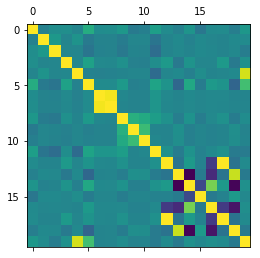

In [136]:
plt.matshow(X_train[feature_names2].corr())

In [139]:
X_train[feature_names2].corr().to_csv("corr2.csv")

In [148]:
print(rescol.loc[rescol['ranking']<=30,:])

                         feature_names  support  ranking
2                                   lt     True        1
3                           block_flag     True        1
7                       service_3_flag     True        1
8                        is_obl_center     True        1
9                             is_my_vf    False       10
10                         balance_sum    False       13
61                         count_app_5    False       29
88                    count_act_type_5    False        9
91                    count_act_type_8     True        1
92                   count_gift_type_1     True        1
96                   service_P_flag_m1    False       16
102                    content_cost_m1    False       18
103                       abon_cost_m1     True        1
104                       abon_part_m1     True        1
105                  act_days_count_m1    False        4
115   voice_onnet_out_day_work_cost_m1    False       28
159              voice_all_in_c

In [149]:
feature_names3 = rescol.loc[rescol['ranking']<=30,'feature_names']

In [146]:
#MODELLING

In [140]:
from sklearn.metrics import roc_auc_score

In [141]:
model2 = LogisticRegression()
model2.fit(X_train[feature_names2], y_train)

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
pred_train = model2.predict_proba(X_train[feature_names2])
pred_train = pred_train[:,1]
roc_auc_score(y_train, pred_train)

0.7721865253643202

In [143]:
pred_test = model2.predict_proba(XY.loc[XY['role']=='valid',feature_names2])
pred_test = pred_test[:,1]
roc_auc_score(y_test, pred_test)

0.7655857572617492

In [145]:
predictions_final_prob = model2.predict_proba(XY.loc[XY['role']=='test',feature_names2])
predictions_final_prob = predictions_final_prob[:,1]
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission2 = pd.DataFrame(sample_submission['id'])
sample_submission2.head()

,id
0,4884052943
1,4849464468
2,4821178833
3,4885021656
4,4857910326


In [ ]:
sample_submission2=pd.merge(sample_submission2,X_final_test,on='id')
sample_submission2.to_csv("music3.csv",index=False)

In [150]:
model3 = LogisticRegression()
model3.fit(X_train[feature_names3], y_train)

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
pred_train = model3.predict_proba(X_train[feature_names3])
pred_train = pred_train[:,1]
roc_auc_score(y_train, pred_train)

0.7945303277625109

In [152]:
pred_test = model3.predict_proba(XY.loc[XY['role']=='valid',feature_names3])
pred_test = pred_test[:,1]
roc_auc_score(y_test, pred_test)

0.78280023569

In [153]:
predictions_final_prob = model3.predict_proba(XY.loc[XY['role']=='test',feature_names3])
predictions_final_prob = predictions_final_prob[:,1]
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission3 = pd.DataFrame(sample_submission['id'])
sample_submission3=pd.merge(sample_submission3,X_final_test,on='id')
sample_submission3.to_csv("music4.csv",index=False)

In [161]:
for i in range(1,50):
    print(i)
    feature_namesi = rescol.loc[rescol['ranking']<=i,'feature_names']
    modeli = LogisticRegression()
    modeli.fit(X_train[feature_namesi], y_train)
    pred_train = modeli.predict_proba(X_train[feature_namesi])
    pred_train = pred_train[:,1]
    print(roc_auc_score(y_train, pred_train))
    pred_test = modeli.predict_proba(XY.loc[XY['role']=='valid',feature_namesi])
    pred_test = pred_test[:,1]
    print(roc_auc_score(y_test, pred_test))

1


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7721865253643202
0.7655857572617492
2


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7759305419847846
0.7704125129627519
3


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7798758874945748
0.7747044664232208
4


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7820155334436923
0.7771764845082816
5


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7836434641612883
0.7782626947813179
6


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7837170162525534
0.7790041780568754
7


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7837199915127161
0.7789872916501325
8


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7837217802107902
0.7789896686223425
9


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7841349163362451
0.7789647764411416
10


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7848640941595224
0.7800587779008669
11


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7850671202458656
0.779966373106197
12


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7866067288306742
0.7816630030482027
13


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7878054694148539
0.7807362645010161
14


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7878004811314461
0.7807604633986557
15


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7879348578121692
0.7805734088911175
16


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7881591239502298
0.781499602715506
17


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7891007760818552
0.7833297062498126
18


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7892871076528407
0.7832490872756849
19


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7895224778868659
0.7833369692204548
20


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.790214202261527
0.7824359316852906
21


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.790387003482725
0.7823677588017631
22


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.790442205184673
0.7823308497054998
23


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7911866813942833
0.7819208219992477
24


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7914664680121664
0.7819685265109653
25


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7914857245571085
0.7819865188700561
26


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7917111949671398
0.782135079633191
27


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.791719654387404
0.7821185728817315
28


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7924793256757023
0.783359715523966
29


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7944025391578625
0.7827016243567815
30


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7945303277625109
0.78280023569
31


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7945401036173314
0.7827719101044956
32


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7945075528543604
0.7827385334530447
33


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7947509043418379
0.7828379701238364
34


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7948268679286915
0.7826986861550216
35


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7951180892270014
0.7824765052803778
36


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952490892235717
0.7825418720161571
37


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952735229573288
0.7822935444472014
38


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952644318846094
0.7822769386552333
39


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952603054821217
0.7823011375528727
40


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952651638930619
0.7822965816894699
41


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7952632158060507
0.7822971429190196
42


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.795430556480323
0.7816979148275394
43


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7954995128572296
0.7818545638988895
44


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7955124351677381
0.7822788864519055
45


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7956287064458439
0.782371027138552
46


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7956701298596572
0.7824237166892105
47


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7956929697040416
0.7823707300170257
48


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.795834005300367
0.7822865455845827
49


c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7959281923557172
0.782262412713949


In [165]:
feature_names4 = rescol.loc[rescol['ranking']<=18,'feature_names']
model4 = LogisticRegression()
model4.fit(X_train[feature_names4], y_train)

c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
predictions_final_prob = model4.predict_proba(XY.loc[XY['role']=='test',feature_names4])
predictions_final_prob = predictions_final_prob[:,1]
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission4 = pd.DataFrame(sample_submission['id'])
sample_submission4=pd.merge(sample_submission4,X_final_test,on='id')
sample_submission4.to_csv("submissions/v2/n4/music5.csv",index=False)

In [162]:
rescol.loc[rescol['ranking']<=18,'feature_names']

2                                   lt
3                           block_flag
7                       service_3_flag
8                        is_obl_center
9                             is_my_vf
10                         balance_sum
88                    count_act_type_5
91                    count_act_type_8
92                   count_gift_type_1
96                   service_P_flag_m1
102                    content_cost_m1
103                       abon_cost_m1
104                       abon_part_m1
105                  act_days_count_m1
195             voice_in_uniq_count_m1
202                   content_count_m1
207                income_brnd_cont_m1
211                  service_9_flag_m1
212                  service_P_flag_m2
226                        paym_sum_m2
229                      paym_count_m2
311             voice_in_uniq_count_m2
327                  service_9_flag_m2
328                  service_P_flag_m3
434                   content_count_m3
444      manufacturer_cat

In [168]:
#column names
feature_names_xgb = list(XY.columns[:])
feature_names_xgb = [e for e in feature_names_xgb if e not in ['id','role','target']]

In [183]:
import xgboost as xgb

In [170]:
from xgboost import XGBClassifier

In [171]:
from sklearn.metrics import roc_auc_score#accuracy_score

In [172]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train[feature_names_xgb], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [175]:
pred_train = model.predict_proba(X_train[feature_names_xgb])
pred_train = pred_train[:,1]
roc_auc_score(y_train, pred_train)

0.8468331345586027

In [177]:
pred_test = model.predict_proba(XY.loc[XY['role']=='valid',feature_names_xgb])
pred_test = pred_test[:,1]
roc_auc_score(y_test, pred_test)

0.816013800436544

In [179]:
predictions_final_prob = model.predict_proba(XY.loc[XY['role']=='test',feature_names_xgb])
predictions_final_prob = predictions_final_prob[:,1]
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission5 = pd.DataFrame(sample_submission['id'])
sample_submission5=pd.merge(sample_submission5,X_final_test,on='id')
sample_submission5.to_csv("submissions/v2/n5/music6.csv",index=False)

In [122]:
#test_main2=test_main.drop(test_main.columns[[0]], axis=1)

In [ ]:
#test_main2.head(10)

In [180]:
#tune GB

In [186]:
# specify parameters via map, definition are same as c++ version
#param = {
#         'objective': 'binary:logistic',
#         'eval_metric':'auc',
#          'max_depth':2, 
#        }

In [187]:
# specify validations set to watch performance
#watchlist  = [(XY.loc[XY['role']=='valid',feature_names_xgb], 'eval'), (X_train[feature_names_xgb], 'train')]

In [188]:
#num_round = 2
#bst = xgb.train(param, X_train[feature_names_xgb], num_round, watchlist)

In [189]:
Xtr = X_train[feature_names_xgb]
Xte = XY.loc[XY['role']=='valid',feature_names_xgb]

In [190]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

Best: 0.822457 using {'n_estimators': 200}
0.804651 (0.004735) with: {'n_estimators': 50}
0.818241 (0.003823) with: {'n_estimators': 100}
0.821275 (0.003207) with: {'n_estimators': 150}
0.822457 (0.003585) with: {'n_estimators': 200}


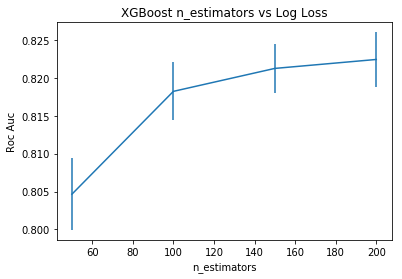

In [191]:
# XGBoost, Tune n_estimators

# grid search
model = XGBClassifier()
n_estimators = range(50, 250, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(Xtr, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Roc Auc')
pyplot.savefig('n_estimators.png')

range(1, 5)
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 19.0min finished


Best: 0.821275 using {'n_estimators': 150, 'max_depth': 3}
0.798534 (0.004000) with: {'n_estimators': 150, 'max_depth': 1}
0.814686 (0.004921) with: {'n_estimators': 150, 'max_depth': 2}
0.821275 (0.003207) with: {'n_estimators': 150, 'max_depth': 3}
0.820562 (0.003378) with: {'n_estimators': 150, 'max_depth': 4}


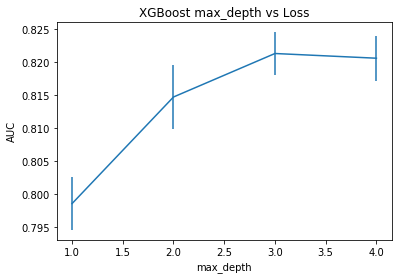

In [197]:
# XGBoost, Tune max_depth

# grid search
model2 = XGBClassifier()
max_depth = range(1, 5)
print(max_depth)
param_grid = dict(max_depth=max_depth,n_estimators = [150])
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model2, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(Xtr, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('AUC')
pyplot.savefig('max_depth.png')

In [ ]:
#use 150 n_estimators and max_depth = 3

In [200]:
# fit model no training data
model3 = xgb.XGBRegressor(max_depth=3,n_estimators=150,objective='binary:logistic' ) 
model3.fit(Xtr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [208]:
pred_train = model3.predict(Xtr)
#pred_train = pred_train[:,1]
print(roc_auc_score(y_train, pred_train))

pred_test = model3.predict(Xte)
#pred_test = pred_test[:,1]
print(roc_auc_score(y_test, pred_test))


0.8627699149083268
0.8202522225020299


In [216]:
predictions_final_prob = model3.predict(XY.loc[XY['role']=='test',feature_names_xgb])
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission6 = pd.DataFrame(sample_submission['id'])
sample_submission6=pd.merge(sample_submission6,X_final_test,on='id')
sample_submission6.to_csv("submissions/v2/n6/music7.csv",index=False)

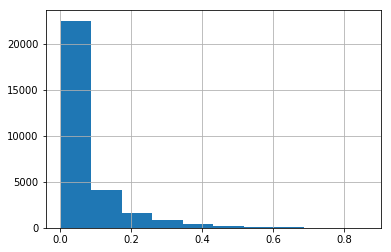

In [222]:
sample_submission6['prediction'].hist()

In [209]:
#early stopping

In [224]:
eval_set = [(Xte, y_test)]

In [225]:
model4 = xgb.XGBRegressor(max_depth=3,n_estimators=150,objective='binary:logistic' ) 


In [228]:
model4.fit(Xtr, y_train, early_stopping_rounds=5, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.745454
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.755943
[2]	validation_0-auc:0.75957
[3]	validation_0-auc:0.769404
[4]	validation_0-auc:0.771643
[5]	validation_0-auc:0.774419
[6]	validation_0-auc:0.77737
[7]	validation_0-auc:0.777717
[8]	validation_0-auc:0.77896
[9]	validation_0-auc:0.779859
[10]	validation_0-auc:0.78108
[11]	validation_0-auc:0.781589
[12]	validation_0-auc:0.781396
[13]	validation_0-auc:0.782092
[14]	validation_0-auc:0.782062
[15]	validation_0-auc:0.783633
[16]	validation_0-auc:0.784011
[17]	validation_0-auc:0.784491
[18]	validation_0-auc:0.784845
[19]	validation_0-auc:0.785393
[20]	validation_0-auc:0.785388
[21]	validation_0-auc:0.785654
[22]	validation_0-auc:0.786435
[23]	validation_0-auc:0.786159
[24]	validation_0-auc:0.787183
[25]	validation_0-auc:0.786945
[26]	validation_0-auc:0.787169
[27]	validation_0-auc:0.787971
[28]	validation_0-auc:0.789651
[29]	validation_0-auc:0.789647
[30]	validation_0-auc

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [229]:
pred_train = model4.predict(Xtr)
#pred_train = pred_train[:,1]
print(roc_auc_score(y_train, pred_train))

pred_test = model4.predict(Xte)
#pred_test = pred_test[:,1]
print(roc_auc_score(y_test, pred_test))

0.85733568191555
0.8194557717441127


In [232]:
predictions = [round(value) for value in pred_test]
# evaluate predictions
accuracy = skl.metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.70%


In [234]:
predictions_final_prob = model4.predict(XY.loc[XY['role']=='test',feature_names_xgb])
X_final_test = XY.loc[XY['role']=='test',['id']]
X_final_test["prediction"] = np.round(predictions_final_prob,6)
sample_submission7 = pd.DataFrame(sample_submission['id'])
sample_submission7=pd.merge(sample_submission7,X_final_test,on='id')
sample_submission7.to_csv("submissions/v2/n7/music8.csv",index=False)

In [201]:
#param_dist = {'objective':'binary:logistic', 'n_estimators':2}

#clf = xgb.XGBModel(**param_dist)

#clf.fit(X_train, y_train,
#        eval_set=[(X_train, y_train), (X_test, y_test)],
#        eval_metric='logloss',
#        verbose=True)

#evals_result = clf.evals_result()